<a href="https://colab.research.google.com/github/tiwanaam/mlforhealthdata/blob/main/NLP_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas requests beautifulsoup4 nltk wordcloud


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


# Download the necessary NLTK resource
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Read the data from an Excel file named "df.xlsm" into a DataFrame
df = pd.read_excel("df.xlsm")

# Select specific columns ('Title', 'Abstract', 'Discussion') from the DataFrame
df = df[['Title', 'Abstract', 'Discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()


,Title,Abstract,Discussion
0,Development of an intelligent clinical decisio...,Background: Diabetic nephropathy (DN) is the m...,This study designed a DSS to predict DN using ...
1,MHealth app using machine learning to increase...,Introduction Depression and diabetes are highl...,Discussion\nIn this randomised controlled tria...
2,Machine learning analysis of the UK Biobank re...,"Aims: We assessed the health data of 11,047 pe...",4.1. The IDEARS platform\nWe applied the IDEAR...
3,Enhancement of Diabetic Retinopathy Prognostic...,One of the primary causes of blindness in the ...,The authors developed a new classification sys...
4,Artificial intelligence using deep learning to...,Background: Radical measures are required to i...,"In this study, we showed that the AI model is ..."


### Tokenize then apply Lemmatization (Lemmatization is generally preferred when the accuracy of the text analysis is crucial. It is more suitable for tasks where the context and meaning of the words are important.)

In [ ]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#  'Title', 'Abstract', and 'Discussion' are the column names
columns_to_preprocess = ['Title', 'Abstract', 'Discussion']

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to tokenize, lemmatize, and join the lemmatized words into a string
def tokenize_lemmatize_and_join(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]
    return ' '.join(lemmatized_words)

# Apply the modified lemmatization function to each specified column
for column in columns_to_preprocess:
    # Convert to lowercase
    df[column] = df[column].str.lower()

    # Remove URLs
    df[column] = df[column].replace(to_replace=r'http\S+', value='', regex=True)

    # Tokenize, lemmatize, and join
    df[column + '_lemmatized'] = df[column].apply(tokenize_lemmatize_and_join)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['tokens'] = df[ 'Abstract'].apply(tokenize_text)
df['tokens'] = df[ 'Discussion'].apply(tokenize_text)
df['tokens'] = df[ 'Title'].apply(tokenize_text)

df.head()



,Title,Abstract,Discussion,Title_lemmatized,Abstract_lemmatized,Discussion_lemmatized,tokens
0,development of an intelligent clinical decisio...,background: diabetic nephropathy (dn) is the m...,this study designed a dss to predict dn using ...,development of an intelligent clinical decisio...,background : diabetic nephropathy ( dn ) be th...,this study design a ds to predict dn use ml te...,"[development, of, an, intelligent, clinical, d..."
1,mhealth app using machine learning to increase...,introduction depression and diabetes are highl...,discussion\nin this randomised controlled tria...,mhealth app use machine learning to increase p...,introduction depression and diabetes be highly...,"discussion in this randomise control trial , w...","[mhealth, app, using, machine, learning, to, i..."
2,machine learning analysis of the uk biobank re...,"aims: we assessed the health data of 11,047 pe...",4.1. the idears platform\nwe applied the idear...,machine learn analysis of the uk biobank revea...,"aim : we assess the health data of 11,047 peop...",4.1. the idears platform we apply the idears p...,"[machine, learning, analysis, of, the, uk, bio..."
3,enhancement of diabetic retinopathy prognostic...,one of the primary causes of blindness in the ...,the authors developed a new classification sys...,enhancement of diabetic retinopathy prognostic...,one of the primary cause of blindness in the d...,the author develop a new classification system...,"[enhancement, of, diabetic, retinopathy, progn..."
4,artificial intelligence using deep learning to...,background: radical measures are required to i...,"in this study, we showed that the ai model is ...",artificial intelligence use deep learning to s...,background : radical measure be require to ide...,"in this study , we show that the ai model be c...","[artificial, intelligence, using, deep, learni..."


###Filter out stopwords


In [ ]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'Abstract, Title, Discussion', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['Abstract', 'tokens', 'tokens_no_stop']].head()
df[['Title', 'tokens', 'tokens_no_stop']].head()
df[['Discussion', 'tokens', 'tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Discussion,tokens,tokens_no_stop
0,this study designed a dss to predict dn using ...,"[development, of, an, intelligent, clinical, d...","[development, intelligent, clinical, decision,..."
1,discussion\nin this randomised controlled tria...,"[mhealth, app, using, machine, learning, to, i...","[mhealth, app, using, machine, learning, incre..."
2,4.1. the idears platform\nwe applied the idear...,"[machine, learning, analysis, of, the, uk, bio...","[machine, learning, analysis, uk, biobank, rev..."
3,the authors developed a new classification sys...,"[enhancement, of, diabetic, retinopathy, progn...","[enhancement, diabetic, retinopathy, prognosti..."
4,"in this study, we showed that the ai model is ...","[artificial, intelligence, using, deep, learni...","[artificial, intelligence, using, deep, learni..."


### FIlter out content specific stop words

In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set([
    'diabetes', 'mental', 'health', 'study', 'studies', 'research', 'patient', 'patients',
    'method', 'methods', 'result', 'results', 'conclusion', 'conclusions', 'finding', 'findings',
    'article', 'articles', 'journal', 'journals', 'publication', 'publications', 'author', 'authors',
    'figure', 'figures', 'table', 'tables', 'figure', 'figures', 'figure', 'et', 'al', 'fig', 'table',
    'using', 'used', 'use', 'based', 'including', 'found', 'showed', 'demonstrated', 'analysis', 'analyses',
    'significant', 'significantly', 'important', 'importantly', 'important', 'higher', 'lower', 'increased',
    'decreased', 'associated', 'association', 'associations', 'correlation', 'correlations', 'effect', 'effects',
    'affect', 'affects', 'affecting', 'significant', 'significantly', 'observed', 'observed', 'observed',
    'group', 'groups', 'control', 'controls', 'treatment', 'treatments', 'intervention', 'interventions', 'disease',
    'diseases', 'condition', 'conditions', 'disorder', 'disorders', 'syndrome', 'syndromes', 'symptom'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Abstract', 'tokens', 'tokens_no_stop_context']].head()
df[['Title', 'tokens', 'tokens_no_stop_context']].head()
df[['Discussion', 'tokens', 'tokens_no_stop_context']].head()

,Discussion,tokens,tokens_no_stop_context
0,this study designed a dss to predict dn using ...,"[development, of, an, intelligent, clinical, d...","[development, intelligent, clinical, decision,..."
1,discussion\nin this randomised controlled tria...,"[mhealth, app, using, machine, learning, to, i...","[mhealth, app, machine, learning, increase, ph..."
2,4.1. the idears platform\nwe applied the idear...,"[machine, learning, analysis, of, the, uk, bio...","[machine, learning, uk, biobank, reveals, prog..."
3,the authors developed a new classification sys...,"[enhancement, of, diabetic, retinopathy, progn...","[enhancement, diabetic, retinopathy, prognosti..."
4,"in this study, we showed that the ai model is ...","[artificial, intelligence, using, deep, learni...","[artificial, intelligence, deep, learning, scr..."


###Vectorization


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#'Title_lemmatized', 'Abstract_lemmatized', and 'Discussion_lemmatized' are the correct column names
columns_to_vectorize = ['Title_lemmatized', 'Abstract_lemmatized', 'Discussion_lemmatized']

# Convert the lemmatized columns in the DataFrame to a series of strings.
cleaned_texts = df[columns_to_vectorize].apply(lambda x: ' '.join(x), axis=1)

# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the cleaned texts
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)


GloVe to create a word vectors by looking at the global word-word co-occurrence matrix from a corpus. The resulting embeddings reflect the probabilities that pairs of words appear together.

In [ ]:
# Make sure you comment the below line after installing the library
!pip install gensim
import gensim.downloader as api
import numpy as np

# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # GloVe model trained on Wikipedia 2014 + Gigaword 5

# Function to vectorize a list of tokens using the GloVe model
def vectorize(tokens):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in glove_model.key_to_index]

    # If no words in the df are in the model's vocabulary, return a zero vector
    if len(tokens) == 0:
        return np.zeros(glove_model.vector_size)

    # Compute the mean of the word vectors for the tokens
    word_vectors = [glove_model[token] for token in tokens]
    return np.mean(word_vectors, axis=0)

# Assuming 'Title_lemmatized', 'Abstract_lemmatized', 'Discussion_lemmatized' are the correct column names
columns_to_vectorize = ['Title_lemmatized', 'Abstract_lemmatized', 'Discussion_lemmatized']

# Create a new column 'embedding' for the resulting embeddings
df['embedding'] = df.apply(lambda row: vectorize(row[columns_to_vectorize]), axis=1)



In [ ]:
# Assuming 'Title_lemmatized', 'Abstract_lemmatized', 'Discussion_lemmatized' are the correct column names
columns_to_vectorize = ['Title_lemmatized', 'Abstract_lemmatized', 'Discussion_lemmatized']

# Iterate through each lemmatized column and create corresponding 'embedding' columns
for column in columns_to_vectorize:
    df[column.replace('_lemmatized', '_embedding')] = df[column].apply(vectorize)


In [ ]:
# Now df['embedding'] contains the word embedding vectors for each row
df.head()

,Title,Abstract,Discussion,Title_lemmatized,Abstract_lemmatized,Discussion_lemmatized,tokens,tokens_no_stop,tokens_no_stop_context,embedding,Title_embedding,Abstract_embedding,Discussion_embedding
0,development of an intelligent clinical decisio...,background: diabetic nephropathy (dn) is the m...,this study designed a dss to predict dn using ...,development of an intelligent clinical decisio...,background : diabetic nephropathy ( dn ) be th...,this study design a ds to predict dn use ml te...,"[development, of, an, intelligent, clinical, d...","[development, intelligent, clinical, decision,...","[development, intelligent, clinical, decision,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37531617, 0.38280523, 0.087026544, -0.1479...","[-0.344438, 0.36545753, 0.12056421, -0.1534486...","[-0.3466203, 0.3627206, 0.09877426, -0.1458196..."
1,mhealth app using machine learning to increase...,introduction depression and diabetes are highl...,discussion\nin this randomised controlled tria...,mhealth app use machine learning to increase p...,introduction depression and diabetes be highly...,"discussion in this randomise control trial , w...","[mhealth, app, using, machine, learning, to, i...","[mhealth, app, using, machine, learning, incre...","[mhealth, app, machine, learning, increase, ph...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.33629176, 0.39688882, 0.10796164, -0.12386...","[-0.35880315, 0.36422768, 0.11734587, -0.14775...","[-0.36349037, 0.35436165, 0.094636984, -0.1425..."
2,machine learning analysis of the uk biobank re...,"aims: we assessed the health data of 11,047 pe...",4.1. the idears platform\nwe applied the idear...,machine learn analysis of the uk biobank revea...,"aim : we assess the health data of 11,047 peop...",4.1. the idears platform we apply the idears p...,"[machine, learning, analysis, of, the, uk, bio...","[machine, learning, analysis, uk, biobank, rev...","[machine, learning, uk, biobank, reveals, prog...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.38058242, 0.34968418, 0.13802044, -0.09988...","[-0.36766267, 0.3821694, 0.11628891, -0.147226...","[-0.37150645, 0.3668727, 0.09904409, -0.133206..."
3,enhancement of diabetic retinopathy prognostic...,one of the primary causes of blindness in the ...,the authors developed a new classification sys...,enhancement of diabetic retinopathy prognostic...,one of the primary cause of blindness in the d...,the author develop a new classification system...,"[enhancement, of, diabetic, retinopathy, progn...","[enhancement, diabetic, retinopathy, prognosti...","[enhancement, diabetic, retinopathy, prognosti...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4078844, 0.31313127, 0.09982846, -0.145132...","[-0.343243, 0.35799477, 0.10354601, -0.1474714...","[-0.34315237, 0.34739742, 0.09734842, -0.13222..."
4,artificial intelligence using deep learning to...,background: radical measures are required to i...,"in this study, we showed that the ai model is ...",artificial intelligence use deep learning to s...,background : radical measure be require to ide...,"in this study , we show that the ai model be c...","[artificial, intelligence, using, deep, learni...","[artificial, intelligence, using, deep, learni...","[artificial, intelligence, deep, learning, scr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4163819, 0.36963835, 0.14756449, -0.183781...","[-0.36010203, 0.35670975, 0.1243746, -0.153491...","[-0.3495426, 0.35033014, 0.09835478, -0.154139..."


### Word cloud visualizing the most frequent words in our tokens_no_stop_context column

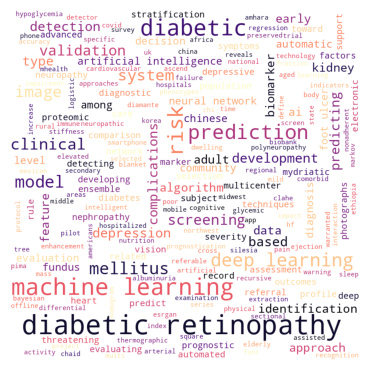

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Specify relevant words to diversity and view word cloud after


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


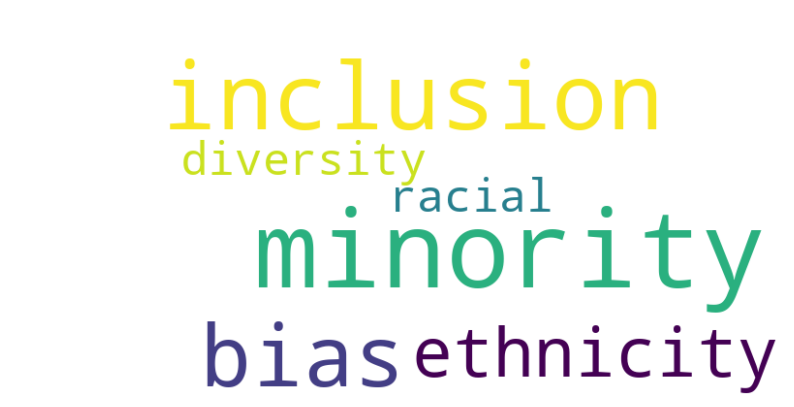

In [ ]:
# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')


# Function to preprocess text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Apply preprocessing to each column (Title, Abstract, Discussion)
df['Title'] = df['Title'].apply(preprocess_text)
df['Abstract'] = df['Abstract'].apply(preprocess_text)
df['Discussion'] = df['Discussion'].apply(preprocess_text)

# Concatenate all text data into a single column for analysis
df['Combined_Text'] = df['Title'] + ' ' + df['Abstract'] + ' ' + df['Discussion']

# Generate a word cloud
combined_text = ' '.join(df['Combined_Text'])

# Defining a list of words related to diversity, equity, and equality
relevant_words = [
    'diversity', 'equity', 'equality', 'bias', 'inclusion', 'fairness',
    'justice', 'disparity', 'cultural competence', 'underrepresented', 'social justice',
    'gender equality', 'cultural diversity', 'accessibility', 'affirmative action',
    'marginalized', 'intersectionality', 'inclusivity', 'cultural sensitivity',
    'equal opportunity', 'social inclusion', 'ethnic diversity', 'gender equity',
    'unbiased', 'non-discrimination', 'equal access', 'racial', 'minority', 'reporting bias',
    'selection bias', 'indigenous', 'health equity', 'arab', 'racism','research bias',
    'ethic','race','ethnicity', 'racial', 'racial minority'
]

# Filter the combined text to include only relevant words
filtered_text = ' '.join(word for word in combined_text.split() if word in relevant_words)

# Generate a word cloud for relevant words
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### Exploring Semantic Relationships of Key Diversity and Bias Terms through Word Embeddings

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

# Define the specific words of interest
keywords_of_interest = ['bias', 'inclusion', 'minority', 'diversity', 'racial', 'white', 'black', 'representation','ethnicity']

# Step 1: Filter Rows with Relevant Keywords
relevant_rows = df[df['Combined_Text'].str.contains('|'.join(keywords_of_interest), case=False)]

# Step 2: Context Analysis
context_sentences = []
for text in relevant_rows['Combined_Text']:
    sentences = sent_tokenize(text)
    for sentence in sentences:
        if any(keyword in sentence.lower() for keyword in keywords_of_interest):
            context_sentences.append(sentence)

# Step 3: Word Embeddings or Clustering
# Assuming you have a list of sentences (each sentence is a list of words) in 'sentences'
sentences_for_embedding = [word_tokenize(sentence) for sentence in context_sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences_for_embedding, vector_size=100, window=5, min_count=1, workers=4)

# Explore Semantic Relationships for each keyword
for keyword in keywords_of_interest:
    similar_words = word2vec_model.wv.most_similar(keyword, topn=5)
    print(f"Semantic Relationships for '{keyword}': {similar_words}")


Semantic Relationships for 'bias': [('finally', 0.9167637228965759), ('improve', 0.9156965613365173), ('provided', 0.9143844246864319), ('information', 0.9141878485679626), ('relationship', 0.913963258266449)]
Semantic Relationships for 'inclusion': [('camera', 0.9365057349205017), ('analyzed', 0.9363420605659485), ('vtdr', 0.935502827167511), ('related', 0.9349554777145386), ('level', 0.934546947479248)]
Semantic Relationships for 'minority': [('predicting', 0.9458698034286499), ('severe', 0.9448670744895935), ('respectively', 0.9445332884788513), ('factors', 0.9438990950584412), ('therefore', 0.9437813758850098)]
Semantic Relationships for 'diversity': [('licensed', 0.47725710272789), ('periphery', 0.47624680399894714), ('reproducible', 0.4596844017505646), ('biased', 0.45681899785995483), ('endothelial', 0.45549991726875305)]
Semantic Relationships for 'racial': [('wu', 0.469312846660614), ('bootstrapping', 0.459617555141449), ('wide', 0.45099711418151855), ('optical', 0.43821918964

### Sentiment Analysis of Key Terms: Exploring Emotional Tone in Discussions on Bias, Inclusion, Minority, Diversity, Racial Issues, Representation, and Ethnicity

In [ ]:
from textblob import TextBlob

# List of words from your word cloud
words_to_analyze = ['bias', 'inclusion', 'minority', 'diversity', 'racial', 'white', 'black', 'representation', 'ethnicity']

for target_word in words_to_analyze:
    # Analyze sentiment for each sentence containing the target word
    sentiment_scores = [
        TextBlob(sentence).sentiment.polarity
        for sentence in context_sentences
        if target_word.lower() in sentence.lower()
    ]

    # Print average sentiment for the target word
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    print(f"Average Sentiment for '{target_word}': {average_sentiment:.2f}")


Average Sentiment for 'bias': 0.10
Average Sentiment for 'inclusion': 0.08
Average Sentiment for 'minority': 0.10
Average Sentiment for 'diversity': 0.08
Average Sentiment for 'racial': 0.09
Average Sentiment for 'white': 0.07
Average Sentiment for 'black': 0.13
Average Sentiment for 'representation': 0.14
Average Sentiment for 'ethnicity': 0.14


In [ ]:
from nltk import Text

# Combine all the text data into one string
all_text = ' '.join(df['Combined_Text'])

# Tokenize the text
tokens = word_tokenize(all_text)

# Create an NLTK Text object for concordance analysis
text = Text(tokens)

# Words to analyze
words_to_analyze = ['diversity', 'inclusion', 'representation', 'bias', 'minority', 'ethnicity', 'racial']

# Display concordance for each word
for target_word in words_to_analyze:
    print(f"\nConcordance for '{target_word}':")
    text.concordance(target_word)
